In [4]:
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [45]:
x = np.arange(0.1, 20, 0.1)

In [55]:
noise = np.random.random(size=x.shape[0])*10
y = x**2 + noise 
# y = np.log(x)
# y = np.sin(x)

In [56]:
noise

array([6.17038494, 5.94007369, 9.54050585, 8.16033384, 3.82519026,
       8.71631817, 5.24125996, 1.91360477, 5.05896146, 1.82029496,
       0.93367515, 2.47004813, 1.97947504, 5.15321364, 8.72394134,
       2.33988938, 6.18803168, 3.47057492, 4.41565359, 2.97346268,
       6.618684  , 3.41068809, 5.55559791, 9.10792629, 3.4592036 ,
       6.70669019, 9.41863158, 7.45048577, 6.22415521, 8.54157045,
       0.33245966, 7.40177047, 0.71206788, 9.27821889, 2.39419592,
       8.00281892, 3.05923123, 0.56220889, 8.79491497, 4.09431577,
       4.14899558, 3.72548332, 7.63376515, 7.4589512 , 3.6214062 ,
       5.43709131, 9.41472506, 3.00743143, 7.55909434, 9.38708596,
       6.44128501, 0.43032365, 6.03370019, 5.67345243, 3.26546218,
       8.65461907, 2.59458559, 0.3407691 , 5.25821276, 7.94390514,
       9.53787423, 7.8155929 , 7.11236714, 7.06051419, 5.37797407,
       1.02900371, 7.29025792, 2.00292116, 8.19153064, 1.93620113,
       8.01658105, 2.97131796, 7.86393696, 0.82472808, 8.87197

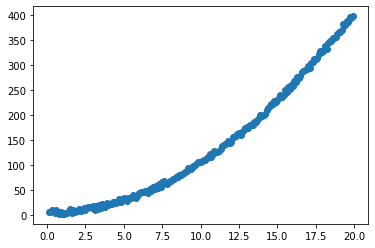

In [57]:
plt.scatter(x, y)

In [58]:
np.corrcoef(x,y)

array([[1.        , 0.96840886],
       [0.96840886, 1.        ]])

In [85]:
cov = np.cov(x,y)
cov

array([[   33.16666667,   663.43553438],
       [  663.43553438, 14150.70640706]])

In [87]:
d = np.diag(cov)
d

array([   33.16666667, 14150.70640706])

In [88]:
d = np.sqrt(d)
d

array([  5.75905085, 118.95674175])

In [89]:
x_std = d[0]
y_std = d[1]
print(x_std, y_std)

5.759050847723666 118.95674174698034


In [90]:
cov

array([[   33.16666667,   663.43553438],
       [  663.43553438, 14150.70640706]])

In [94]:
c  = cov / (x_std * y_std)
c

array([[ 0.04841298,  0.96840886],
       [ 0.96840886, 20.65561581]])

In [95]:
np.clip(c.real, -1, 1, out=c.real)

array([[0.04841298, 0.96840886],
       [0.96840886, 1.        ]])

In [78]:
np.cov(x,y) / (x_std * y_std)

array([[ 0.04841298,  0.96840886],
       [ 0.96840886, 20.65561581]])

In [96]:
x_var

33.16666666666667

In [101]:
def my_corr(x, y):
    c = np.cov(x, y)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev[:, None]
    c /= stddev[None, :]
    import pdb; pdb.set_trace()

    # Clip real and imaginary parts to [-1, 1].  This does not guarantee
    # abs(a[i,j]) <= 1 for complex arrays, but is the best we can do without
    # excessive work.
    np.clip(c.real, -1, 1, out=c.real)
    if np.iscomplexobj(c):
        np.clip(c.imag, -1, 1, out=c.imag)

In [ ]:
my_corr(x, y)

> <ipython-input-101-e44e2ee90b69>(17)my_corr()
-> np.clip(c.real, -1, 1, out=c.real)


# Covariance Notes
* When the covariance value is **positive** we classify the trend between $X$ and $Y$ as positive. 
* Remember, the covariance value itself is rather difficult to interpret and depends on the context (See video [here](https://youtu.be/qtaqvPAeEJY?t=710))
* For example, the covariance value does not tell us if the slope of the line representing the relationship is steep. It just tells us that the slope is positive
* It also does not tell us if the points are relatively close to the line of best fit, or relatively far. It just tells us that the slope of the relationship is positive. 
* The main thing that the covariance is used for is as a stepping stone in the computation of the correlation

# Correlation Notes
* When a straight line with a positive slope goes through our data points, correlation equals 1
